In [5]:
!pip install keras
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Lowercase and remove punctuation
paragraph = """Books have always been a window into new worlds for me. They allow me to explore history, experience emotions, and learn about diverse cultures. Whether it's fiction or non-fiction, reading enriches my mind and fuels my imagination. I find joy in turning the pages of a good novel on a quiet evening. E-books are convenient, but I still love the feel of a printed book in my hands."""
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())

# Step 2: Tokenize into sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens = word_tokenize(text_clean)

# Step 3: Split using split() and word_tokenize()
split_words = text_clean.split()
print("Using split():", split_words[:10])
print("Using word_tokenize():", word_tokens[:10])

# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

# Step 5: Display word frequency (excluding stopwords)
word_freq = Counter(filtered_words)
print("Word Frequency Distribution (excluding stopwords):")
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Using split(): ['books', 'have', 'always', 'been', 'a', 'window', 'into', 'new', 'worlds', 'for']
Using word_tokenize(): ['books', 'have', 'always', 'been', 'a', 'window', 'into', 'new', 'worlds', 'for']
Word Frequency Distribution (excluding stopwords):
books: 1
always: 1
window: 1
new: 1
worlds: 1
allow: 1
explore: 1
history: 1
experience: 1
emotions: 1
learn: 1
diverse: 1
cultures: 1
whether: 1
fiction: 1
nonfiction: 1
reading: 1
enriches: 1
mind: 1
fuels: 1
imagination: 1
find: 1
joy: 1
turning: 1
pages: 1
good: 1
novel: 1
quiet: 1
evening: 1
ebooks: 1
convenient: 1
still: 1
love: 1
feel: 1
printed: 1
book: 1
hands: 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

paragraph = """Books have always been a window into new worlds for me. They allow me to explore history, experience emotions, and learn about diverse cultures. Whether it's fiction or non-fiction, reading enriches my mind and fuels my imagination. I find joy in turning the pages of a good novel on a quiet evening. E-books are convenient, but I still love the feel of a printed book in my hands."""

# Step 1: Extract words with only alphabets
text_clean = paragraph.lower()
alphabetic_words = re.findall(r'\b[a-z]+\b', text_clean)

# Step 2: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alphabetic_words if word not in stop_words]

# Step 3: Perform stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Step 4: Perform lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Step 5: Compare stemmed vs lemmatized output
print("Original words (no stopwords):")
print(filtered_words[:15])
print("\nStemmed words:")
print(stemmed_words[:15])
print("\nLemmatized words:")
print(lemmatized_words[:15])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original words (no stopwords):
['books', 'always', 'window', 'new', 'worlds', 'allow', 'explore', 'history', 'experience', 'emotions', 'learn', 'diverse', 'cultures', 'whether', 'fiction']

Stemmed words:
['book', 'alway', 'window', 'new', 'world', 'allow', 'explor', 'histori', 'experi', 'emot', 'learn', 'divers', 'cultur', 'whether', 'fiction']

Lemmatized words:
['book', 'always', 'window', 'new', 'world', 'allow', 'explore', 'history', 'experience', 'emotion', 'learn', 'diverse', 'culture', 'whether', 'fiction']


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

texts = [
    "This phone has an amazing battery life and stunning camera.",
    "The laptop is lightweight and performs exceptionally well.",
    "I love this coffee maker, it brews very quickly and tastes great."
]

# 1. Bag of Words using CountVectorizer
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(texts)
bow_df = pd.DataFrame(count_matrix.toarray(), columns=count_vec.get_feature_names_out())
print("Bag of Words Representation:\n", bow_df)

# 2. TF-IDF using TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out())

# 3. Top 3 TF-IDF keywords per document
print("\nTop 3 TF-IDF keywords per document:")
for i, row in enumerate(tfidf_matrix.toarray()):
    top_indices = row.argsort()[-3:][::-1]
    top_terms = [(tfidf_vec.get_feature_names_out()[idx], row[idx]) for idx in top_indices]
    print(f"\nText {i+1}: {texts[i]}")
    for term, score in top_terms:
        print(f"  - {term}: {score:.4f}")


Bag of Words Representation:
    amazing  an  and  battery  brews  camera  coffee  exceptionally  great  \
0        1   1    1        1      0       1       0              0      0   
1        0   0    1        0      0       0       0              1      0   
2        0   0    1        0      1       0       1              0      1   

   has  ...  maker  performs  phone  quickly  stunning  tastes  the  this  \
0    1  ...      0         0      1        0         1       0    0     1   
1    0  ...      0         1      0        0         0       0    1     0   
2    0  ...      1         0      0        1         0       1    0     1   

   very  well  
0     0     0  
1     0     1  
2     1     0  

[3 rows x 26 columns]

Top 3 TF-IDF keywords per document:

Text 1: This phone has an amazing battery life and stunning camera.
  - phone: 0.3347
  - stunning: 0.3347
  - camera: 0.3347

Text 2: The laptop is lightweight and performs exceptionally well.
  - well: 0.3689
  - the: 0.3689


In [19]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample Texts
text1 = """Artificial Intelligence (AI) enables machines to learn from data and make decisions.
It powers applications like chatbots, image recognition, and recommendation systems."""

text2 = """Blockchain is a decentralized ledger technology that ensures transparency and security.
It is widely used in cryptocurrencies and supply chain management systems."""

# Preprocessing Function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

# Step 1: Preprocess and Tokenize
tokens1 = set(preprocess(text1).split())
tokens2 = set(preprocess(text2).split())

print("Tokens in Text 1:", tokens1)
print("Tokens in Text 2:", tokens2)

# Step 2a: Jaccard Similarity
intersection = tokens1.intersection(tokens2)
union = tokens1.union(tokens2)
jaccard_similarity = len(intersection) / len(union)
print("\nJaccard Similarity:", round(jaccard_similarity, 4))

# Step 2b: Cosine Similarity using TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print("Cosine Similarity:", round(cos_sim, 4))

# Step 2c: Analysis
print("\nAnalysis:")
if cos_sim > jaccard_similarity:
    print("Cosine Similarity provides better insight in this case as it captures contextual and semantic similarity.")
else:
    print("Jaccard Similarity is more appropriate when analyzing exact word overlap.")


Tokens in Text 1: {'artificial', 'recognition', 'it', 'powers', 'recommendation', 'ai', 'enables', 'applications', 'and', 'intelligence', 'to', 'learn', 'from', 'data', 'machines', 'chatbots', 'systems', 'decisions', 'make', 'like', 'image'}
Tokens in Text 2: {'ledger', 'decentralized', 'supply', 'ensures', 'a', 'it', 'cryptocurrencies', 'widely', 'and', 'technology', 'security', 'systems', 'used', 'management', 'blockchain', 'that', 'transparency', 'is', 'chain', 'in'}

Jaccard Similarity: 0.0789
Cosine Similarity: 0.1411

Analysis:
Cosine Similarity provides better insight in this case as it captures contextual and semantic similarity.


Review Sentiment Analysis:

Review: This smartwatch is fantastic! The battery lasts for days and the display is super clear.
 → Polarity: 0.31, Subjectivity: 0.65, Sentiment: Positive

Review: The setup process was confusing and the app kept crashing.
 → Polarity: -0.30, Subjectivity: 0.40, Sentiment: Negative

Review: It's an okay product. Does the job but nothing exceptional.
 → Polarity: 0.58, Subjectivity: 0.75, Sentiment: Positive



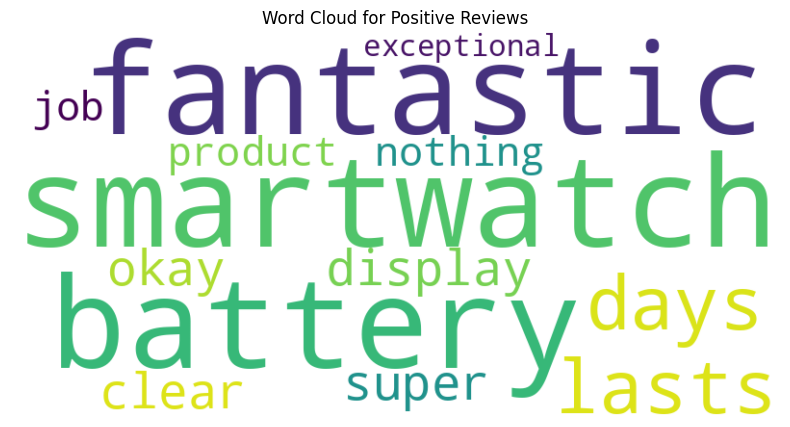

In [20]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample Reviews
reviews = [
    "This smartwatch is fantastic! The battery lasts for days and the display is super clear.",
    "The setup process was confusing and the app kept crashing.",
    "It's an okay product. Does the job but nothing exceptional."
]

# Step 1 & 2: Analyze sentiment and classify
classified_reviews = []
positive_text = ""

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if polarity > 0.1:
        sentiment = "Positive"
        positive_text += " " + review
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    classified_reviews.append({
        "review": review,
        "polarity": polarity,
        "subjectivity": subjectivity,
        "sentiment": sentiment
    })

# Print classification
print("Review Sentiment Analysis:\n")
for entry in classified_reviews:
    print(f"Review: {entry['review']}")
    print(f" → Polarity: {entry['polarity']:.2f}, Subjectivity: {entry['subjectivity']:.2f}, Sentiment: {entry['sentiment']}\n")

# Step 3: Generate word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()
